In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv(r"IPL_2022/ipl_2022_dataset.csv", encoding="ISO-8859-1")
df = pd.DataFrame(ipl)
df.head()
df.shape


(633, 8)

NOW WE ARE DOING DATA CLEANING PROCESS

In [3]:
df.isnull().sum()
#THE ABOVE IS TO RETURN HOW MANY NULL VALUES
df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN â¹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [4]:
ipl.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
ipl.columns
ipl.head()

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [5]:
df.isnull().sum() #633-434 players weren't picked by the ipl teams

Unnamed: 0             0
Player                 0
Base Price             0
TYPE                   0
COST IN â¹ (CR.)    396
Cost IN $ (000)      396
2021 Squad           434
Team                   0
dtype: int64

In [6]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [8]:
ipl['COST IN â\x82¹ (CR.)']=ipl['COST IN â\x82¹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)']=ipl['Cost IN $ (000)'].fillna(0)
ipl.head(5)
#CLEANING THE NULL VALUES AND FITTING 0 FOR IT IN INT COLUMNS

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [9]:
ipl[ipl['2021 Squad'].isnull()] 

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [10]:
#we will replace all the null values in 2021 ipl squad with not participated
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [11]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN â¹ (CR.)    0
Cost IN $ (000)      0
2021 Squad           0
Team                 0
dtype: int64

In [12]:
#ipl teams
teams=ipl[ipl['COST IN â\x82¹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
ipl['status']=ipl['Team'].replace(teams,'Sold')

In [14]:
ipl.head()

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold


In [15]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


DATA ANALYSIS STARTING HERE

In [15]:
#How many players participated in the 2022 auction?
ipl.shape[0]

633

In [16]:
#How many types of players have participated??
types=ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

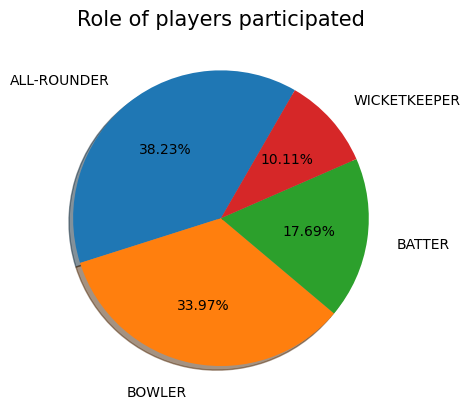

In [17]:
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct="%1.2f%%", shadow=True, startangle=60)
plt.title("Role of players participated",fontsize=15)
plt.plot()


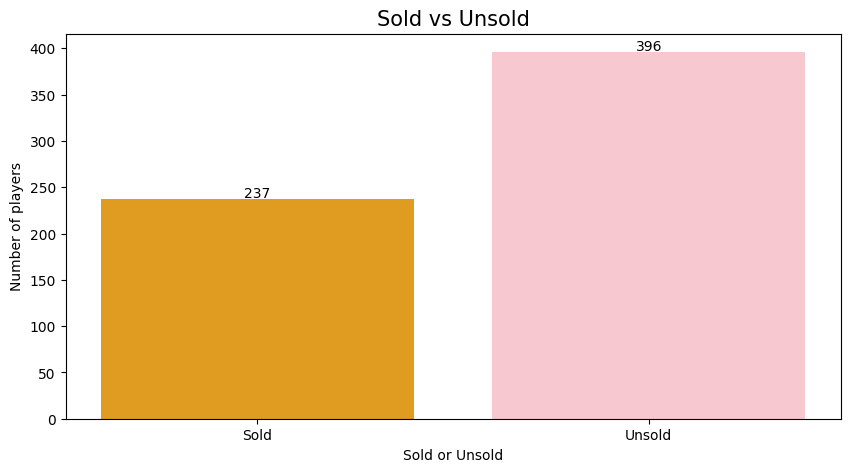

In [18]:
#Players sold and unsold using bar graph
plt.figure(figsize=(10,5))
fig = sns.countplot(x='status', data=ipl, palette=["Orange","Pink"])
plt.xlabel("Sold or Unsold")
plt.ylabel("Number of players")
plt.title("Sold vs Unsold", fontsize=15)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='center',xytext=(0,4),textcoords='offset points')

In [19]:
ipl.groupby('status')['Player'].count()

status
Sold      237
Unsold    396
Name: Player, dtype: int64

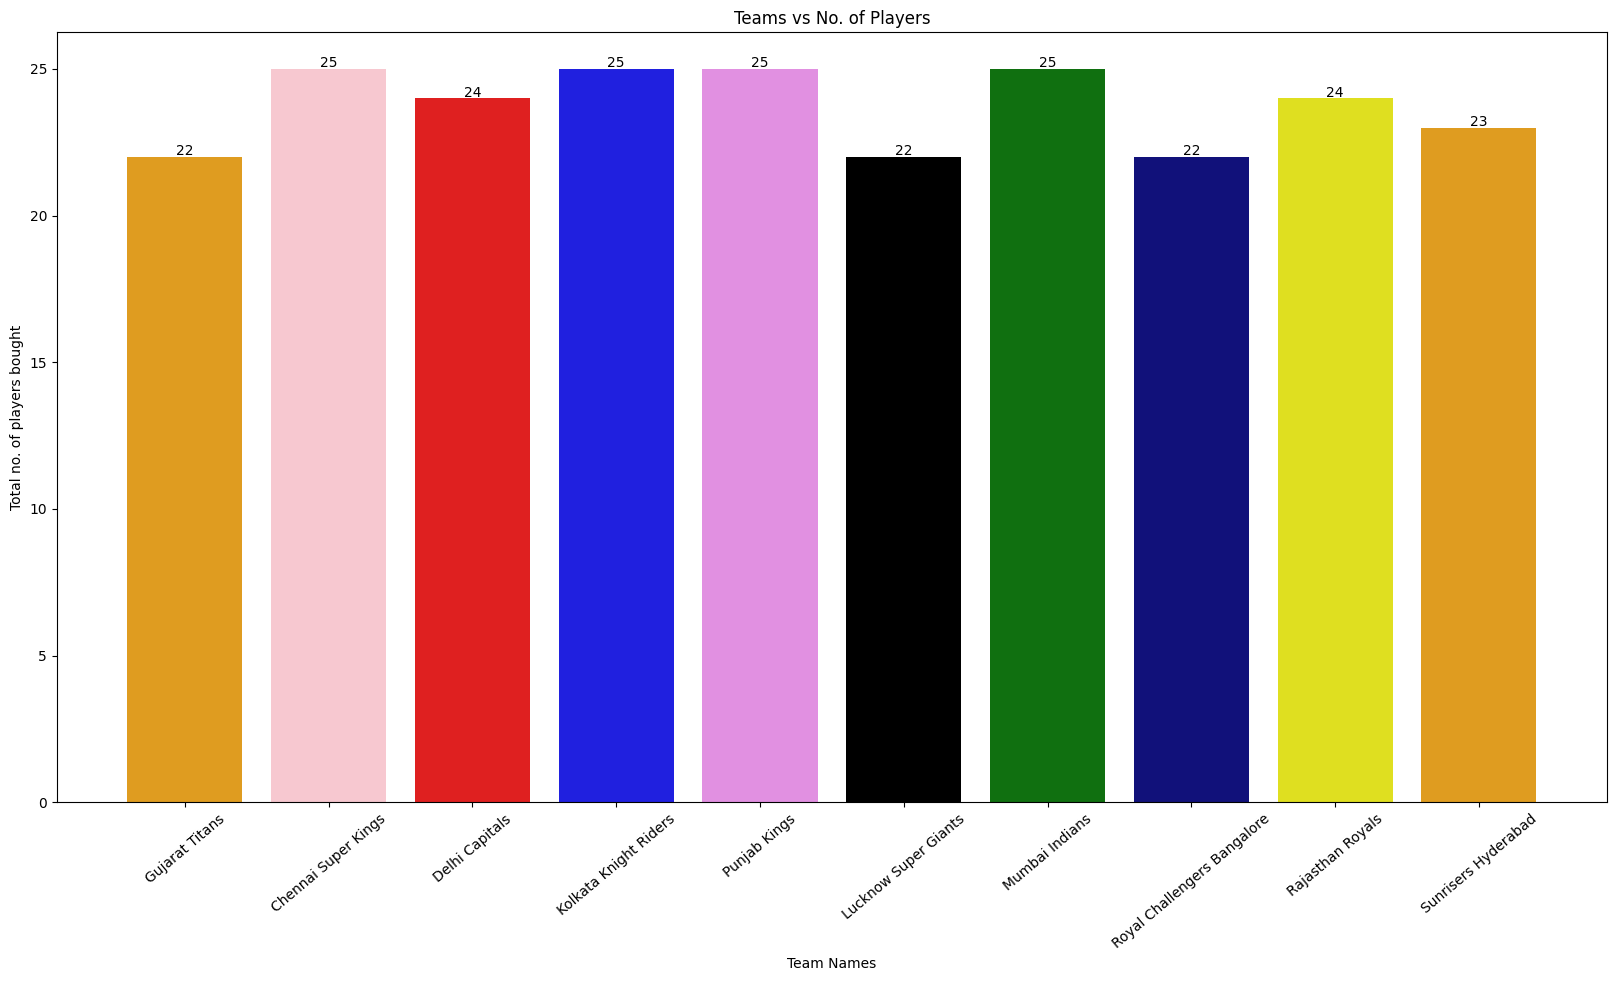

In [20]:
#Total no. of players bought by each team
plt.figure(figsize=(20,10))
#fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
fig = sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'], data=ipl, palette=["Orange","Pink","Red","Blue","Violet","Black","Green","Darkblue","Yellow"])
plt.xlabel("Team Names")
plt.ylabel("Total no. of players bought")
plt.title("Teams vs No. of Players")
plt.xticks(rotation=40)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='center',xytext=(0,4),textcoords='offset points')

In [21]:
ipl['retention']=ipl['Base Price']
ipl.head()

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,2 Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,40 Lakh
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick


In [23]:

ipl['retention'].replace(['2Cr','40 Lakh','20 Lakh','1 Cr','75 Lakh','50 Lakh','30 Lakh','1.5 Cr'],'From Auction', inplace=True)

In [24]:
# Treating Base Price
ipl['Base Price'].replace('Draft Pick',0,inplace=True)



In [25]:
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x:str(x).split(' ')[-1])
ipl['base_Price']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])
ipl.head()

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_Price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,2 Cr,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [26]:
ipl['base_Price'].replace('Retained',0,inplace=True)
ipl.head()

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_Price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,2 Cr,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [27]:
#Total players retained and bought
ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          2 Cr             5
                             From Auction    16
                             Retained         4
Delhi Capitals               2 Cr             4
                             From Auction    16
                             Retained         4
Gujarat Titans               2 Cr             4
                             Draft Pick       3
                             From Auction    15
Kolkata Knight Riders        2 Cr             4
                             From Auction    17
                             Retained         4
Lucknow Super Giants         2 Cr             4
                             Draft Pick       3
                             From Auction    15
Mumbai Indians               2 Cr             2
                             From Auction    19
                             Retained         4
Punjab Kings                 2 Cr             2
                             From Auction    2

Finding Different types of players in each team

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

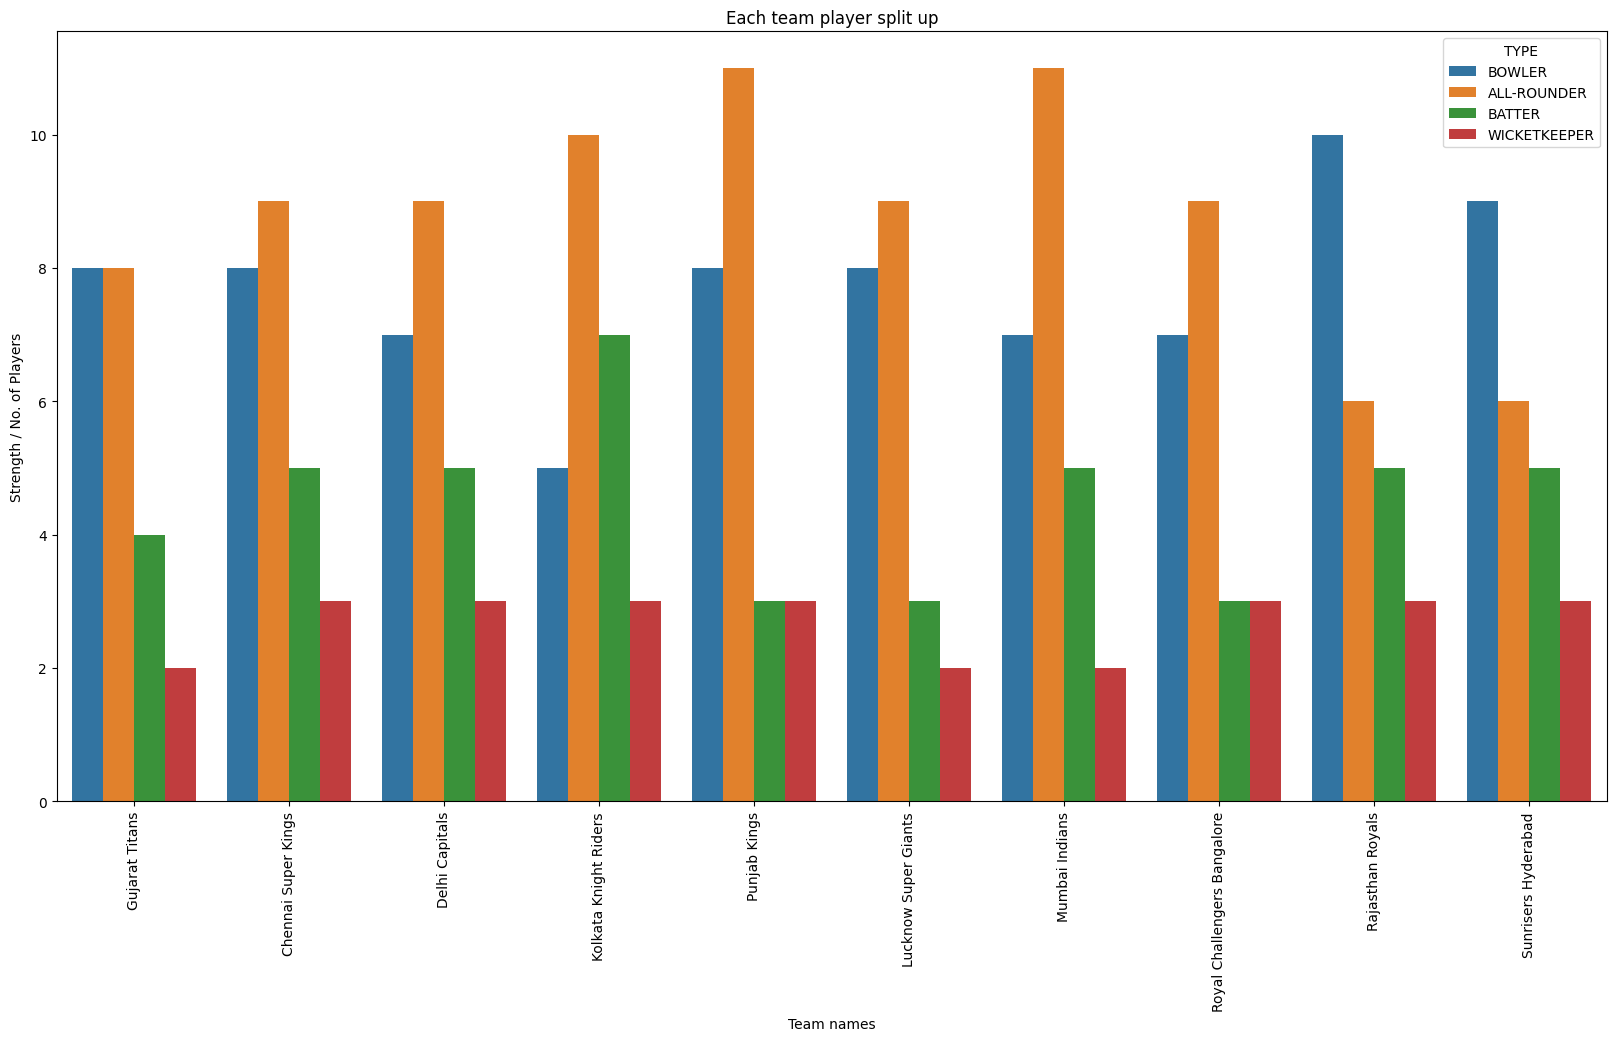

In [28]:
plt.figure(figsize=(20,10))
fig=sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title("Each team player split up")
plt.xlabel("Team names")
plt.ylabel("Strength / No. of Players")
plt.xticks(rotation=90)

In [29]:
#Highest Amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN â\x82¹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Punjab Kings                   11.50
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Gujarat Titans                  9.00
Mumbai Indians                  8.25
Kolkata Knight Riders           8.00
Delhi Capitals                  5.25
Chennai Super Kings             4.00
Name: COST IN â¹ (CR.), dtype: float64

In [30]:
#Players retained at maximum price
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN â\x82¹ (CR.)',ascending=False).head(1)

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_Price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,0


In [31]:
#Top 5 Bowlers picked in ipl 2022 auction
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='ALL-ROUNDER')].sort_values(by='COST IN â\x82¹ (CR.)',ascending=False).head(5)


,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_Price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,Sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction,Cr,1
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,Sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
216,Washington Sundar,1.5 Cr,ALL-ROUNDER,8.75,1137.5,RCB,Sunrisers Hyderabad,Sold,From Auction,Cr,1.5


In [35]:
#Top sold 5 batsman 
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BATTER')].sort_values(by='COST IN â\x82¹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN â¹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_Price
193,Shimron Hetmyer,1.5 Cr,BATTER,8.5,1105.0,DC,Rajasthan Royals,Sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.5,1105.0,KKR,Sunrisers Hyderabad,Sold,From Auction,Lakh,40
129,Manish Pandey,1 Cr,BATTER,4.6,598.0,SRH,Lucknow Super Giants,Sold,From Auction,Cr,1
150,Dewald Brevis,20 Lakh,BATTER,3.0,390.0,Not Participated,Mumbai Indians,Sold,From Auction,Lakh,20
7,David Miller,1 Cr,BATTER,3.0,390.0,RR,Gujarat Titans,Sold,From Auction,Cr,1


In [36]:
ipl=ipl.rename(columns={'2021 Squad':'Prev_team'})


In [37]:
unsold_players=ipl[(ipl.Prev_team != 'Not Participated') & (ipl.Team=='Unsold')][['Player','Prev_team']]

In [38]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr